# DATA VALIDATION 

Starting with loading all the tools we will be working with and checking the first 'image' of our data.

In [1]:
#Importing the necessary libraries and modules while setting some technical requirements for better display. 

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Loading and displaying the source data while creating a copy to work with.

raw_data = pd.read_csv("toyota.csv")
df = raw_data.copy()
df

model  year  price transmission  mileage fuelType  tax    mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265   36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145   36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265   36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150   36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145   36.2   
5               GT86  2017  15998       Manual    26919   Petrol  260   36.2   
6               GT86  2017  18522       Manual    10456   Petrol  145   36.2   
7               GT86  2017  18995       Manual    12340   Petrol  145   36.2   
8               GT86  2020  27998       Manual      516   Petrol  150   33.2   
9               GT86  2016  13990       Manual    37999   Petrol  265   36.2   
10              GT86  2013  10495       Manual    72000   Petrol  265   36.2   
11              GT86  2017  17990       Manual    12597   Petrol  145   36.2   
12              GT86  2017  16995       Manual    36100   Petrol  145   36.2   
13              GT86  2019  23995       Manual      995   Petrol  145   33.2   
14              GT86  2018  18498       Manual    35228   Petrol  145   36.2   
15              GT86  2019  23980       Manual     1751   Petrol  145   33.2   
16              GT86  2017  17995       Manual    16444   Petrol  265   36.2   
17              GT86  2014  12998       Manual    25499   Petrol  260   36.2   
18              GT86  2019  23495    Automatic     3934   Petrol  145   32.8   
19              GT86  2019  25780       Manual     5123   Petrol  145   33.2   
20              GT86  2020  26995    Semi-Auto     1500   Petrol  145   32.8   
21              GT86  2019  23998    Semi-Auto      913   Petrol  145   32.8   
22              GT86  2019  26995       Manual     2680   Petrol  150   33.2   
23              GT86  2017  17000       Manual    14345   Petrol  150   36.2   
24              GT86  2018  19995       Manual    15525   Petrol  150   36.2   
25              GT86  2020  31000       Manual     3000   Petrol  145   33.2   
26              GT86  2016  15995    Semi-Auto    19460   Petrol  200   39.8   
27              GT86  2018  18490       Manual    31231   Petrol  150   36.2   
28              GT86  2020  24990       Manual      339   Petrol  145   33.2   
29              GT86  2015  13981       Manual    30500   Petrol  265   36.2   
30              GT86  2015  13991       Manual    38126   Petrol  260   36.2   
31              GT86  2019  27060    Automatic     3348   Petrol  145   32.8   
32              GT86  2018  20695       Manual     5260   Petrol  145   36.2   
33              GT86  2019  25999       Manual      100   Petrol  145   33.2   
34              GT86  2013  11575       Manual    50584   Petrol  265   36.2   
35              GT86  2017  20995       Manual     6445   Petrol  145   36.2   
36              GT86  2014  14999       Manual    18389   Petrol  260   36.2   
37              GT86  2019  27000    Semi-Auto      100   Petrol  145   32.8   
38              GT86  2016  15000       Manual    28321   Petrol  265   36.2   
39              GT86  2019  22200    Semi-Auto    16241   Petrol  145   32.8   
40              GT86  2019  24990       Manual     3150   Petrol  145   33.2   
41              GT86  2019  25995       Manual     8912   Petrol  145   33.2   
42              GT86  2017  19500       Manual     9639   Petrol  260   36.2   
43              GT86  2017  18250       Manual    20219   Petrol  145   36.2   
44              GT86  2019  23995       Manual     1557   Petrol  150   33.2   
45              GT86  2016  17500       Manual    14000   Petrol  260   36.2   
46              GT86  2019  23997       Manual     4500   Petrol  145   33.2   
47              GT86  2017  17102       Manual    21000   Petrol  260   36.2   
48              GT86  2019  24995       Manual     2488   Petrol  145   33.2   
49             

In [3]:
#Displaying some general information about our dataset.
#We observe that there are not missing values and we can identify each column's data type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [4]:
#Displaying the amount of different values that each column has.

df.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

In [5]:
#Displaying some more detailed information about our dataset.

df_stats = df.describe()
df_stats= df_stats.transpose()
df_stats

count          mean           std     min     25%      50%  \
year        6738.0   2016.748145      2.204062  1998.0  2016.0   2017.0   
price       6738.0  12522.391066   6345.017587   850.0  8290.0  10795.0   
mileage     6738.0  22857.413921  19125.464147     2.0  9446.0  18513.0   
tax         6738.0     94.697240     73.880776     0.0     0.0    135.0   
mpg         6738.0     63.042223     15.836710     2.8    55.4     62.8   
engineSize  6738.0      1.471297      0.436159     0.0     1.0      1.5   

                 75%       max  
year         2018.00    2020.0  
price       14995.00   59995.0  
mileage     31063.75  174419.0  
tax           145.00     565.0  
mpg            69.00     235.0  
engineSize      1.80       4.5

# EXPLORATORY ANALYSIS

At this phase we need to seperate the target variable from all the rest as well as examine the relationships between them, both numeric and categorical. 

The names of the graphs provided are self explanatory.

## Target Variable: Price

[Text(0.5, 1.0, 'The Distribution of Target Variable - Price (Log Scale)')]

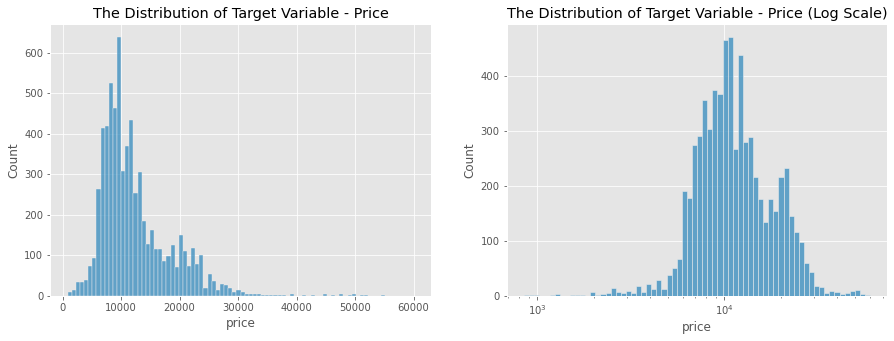

In [6]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['price'],ax=axes[0]).set(title='The Distribution of Target Variable - Price')
sns.histplot(df['price'],log_scale=True,ax=axes[1]).set(title='The Distribution of Target Variable - Price (Log Scale)')

## Numeric Variables: Mileage, Tax, MPG

[Text(0.5, 1.0, 'Correlation Heatmap between Numeric Variables')]

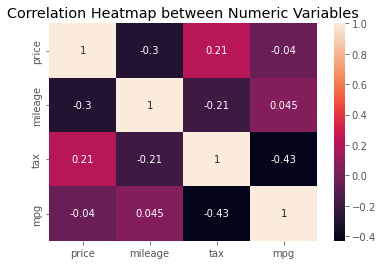

In [7]:
numeric = df[['price','mileage','tax','mpg']]
sns.heatmap(numeric.corr(),annot=True).set(title='Correlation Heatmap between Numeric Variables')

[Text(0.5, 1.0, 'Price vs Mileage')]

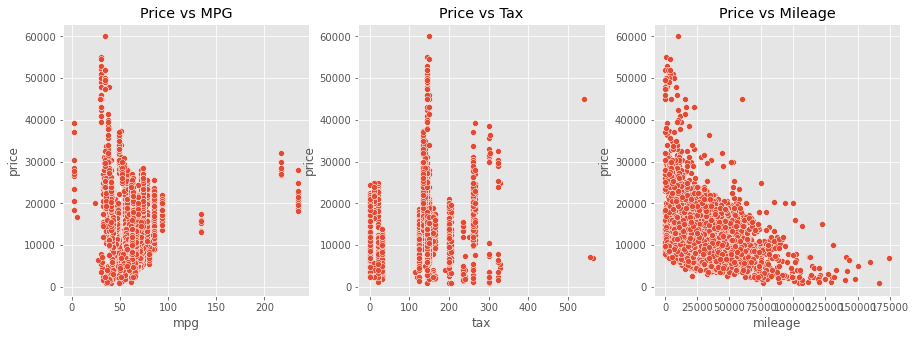

In [8]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(y=df['price'],x=df['mpg'],ax=axes[0]).set(title='Price vs MPG')
sns.scatterplot(y=df['price'],x=df['tax'],ax=axes[1]).set(title='Price vs Tax')
sns.scatterplot(y=df['price'],x=df['mileage'],ax=axes[2]).set(title='Price vs Mileage')

## Categorical Variables: Year, Engine Size, Model, Transmission, Fuel Type

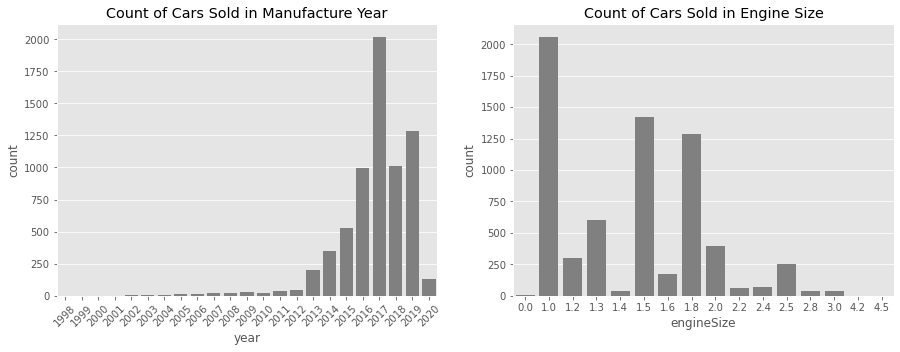

In [9]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['year'], color='gray',ax=axes[0]).set(title='Count of Cars Sold in Manufacture Year')
sns.countplot(x=df['engineSize'],color='gray',ax=axes[1]).set(title='Count of Cars Sold in Engine Size')
axes[0].tick_params(axis='x', labelrotation=45)

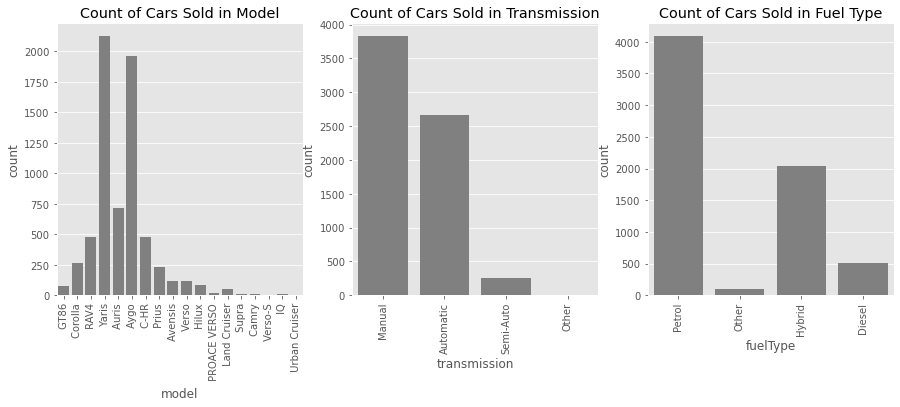

In [10]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['model'], color='gray',ax=axes[0]).set(title='Count of Cars Sold in Model')
sns.countplot(x=df['transmission'], color='gray',ax=axes[1]).set(title='Count of Cars Sold in Transmission')
sns.countplot(x=df['fuelType'],color='gray',ax=axes[2]).set(title='Count of Cars Sold in Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

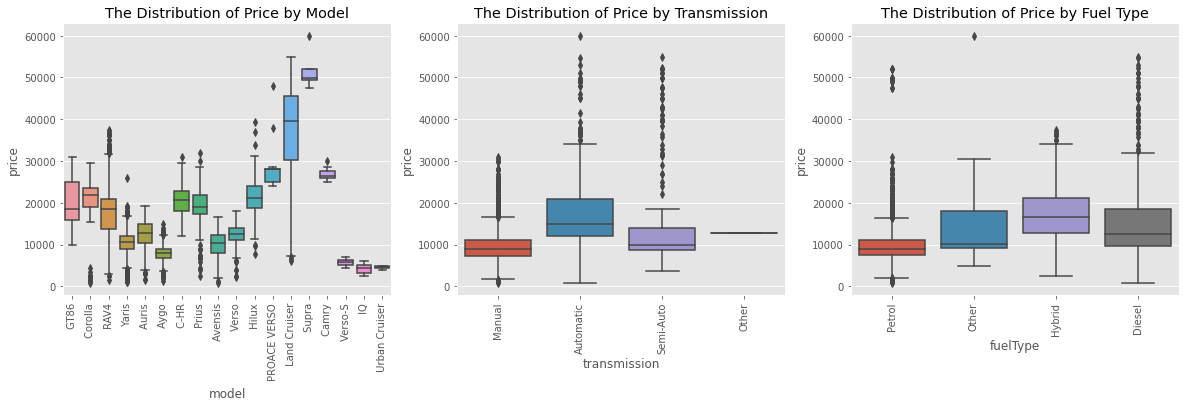

In [11]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df, x='model',y='price',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=df, x='transmission',y='price',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=df, x='fuelType',y='price',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

# MODEL FITTING AND EVALUATION

Last but most important part of the project, where we apply all the necessary operations before building and testing our neural network.

## Model Preparation

In [12]:
#Dropping the MPG column as earlier we indentified strong correlation between this and other variables 
#which could affect our model.

df = df.drop(columns=['mpg'])

In [13]:
#Turning all variables to numeric data types.

num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include=object)
encoding=OrdinalEncoder()
cat_cols=cat_df.columns.tolist()
encoding.fit(cat_df[cat_cols])
cat_oe=encoding.transform(cat_df[cat_cols])
cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)
cat_df.reset_index(inplace=True,drop=True)
num_df.reset_index(inplace=True,drop=True)
cat_oe.reset_index(inplace=True,drop=True)
df=pd.concat([num_df,cat_oe],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6738 non-null   int64  
 1   price         6738 non-null   int64  
 2   mileage       6738 non-null   int64  
 3   tax           6738 non-null   int64  
 4   engineSize    6738 non-null   float64
 5   model         6738 non-null   float64
 6   transmission  6738 non-null   float64
 7   fuelType      6738 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 421.2 KB


In [14]:
#Checking the outliers of our variables.

cols=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'engineSize']

C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\K

<AxesSubplot:xlabel='mileage'>

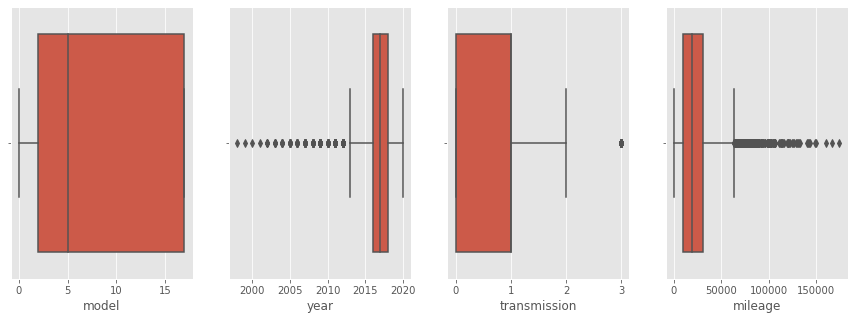

In [15]:
fig, axes = plt.subplots(1,4,figsize=(15,5))
sns.boxplot(df[cols[0]],ax=axes[0])
sns.boxplot(df[cols[1]],ax=axes[1])
sns.boxplot(df[cols[2]],ax=axes[2])
sns.boxplot(df[cols[3]],ax=axes[3])

C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Konstantinos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engineSize'>

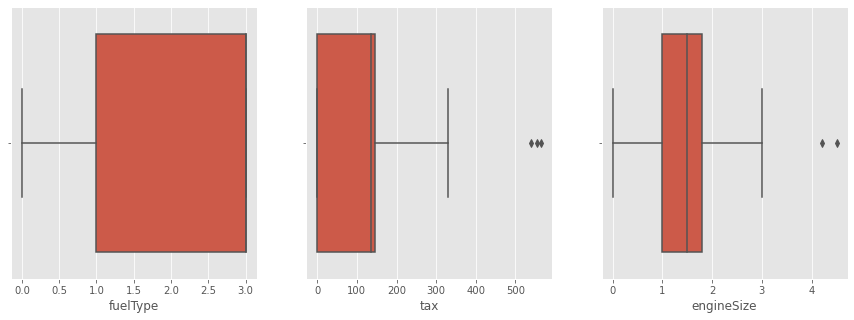

In [16]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df[cols[4]],ax=axes[0])
sns.boxplot(df[cols[5]],ax=axes[1])
sns.boxplot(df[cols[6]],ax=axes[2])

In [17]:
#Building two functions for finding and removing the unecessary outliers of our variables which could also affect our model.

def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    #calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    #identify outliers
    outliers = [x for x in df[col] if x >= upper or x <= lower]
    print('Identified outliers: %d' % len(outliers))
    #remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final

outlier_cols=['year','mileage','tax', 'engineSize','transmission']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)

year
--------------------------------------------------
Percentiles: 25th=2016.000, 75th=2018.000, IQR=2.000
Lower: 2013.0  Upper: 2021.0
Identified outliers: 416
Non-outlier observations: 6526
mileage
--------------------------------------------------
Percentiles: 25th=9446.000, 75th=31063.750, IQR=21617.750
Lower: -22980.625  Upper: 63490.375
Identified outliers: 269
Non-outlier observations: 6469
tax
--------------------------------------------------
Percentiles: 25th=0.000, 75th=145.000, IQR=145.000
Lower: -217.5  Upper: 362.5
Identified outliers: 3
Non-outlier observations: 6735
engineSize
--------------------------------------------------
Percentiles: 25th=1.000, 75th=1.800, IQR=0.800
Lower: -0.20000000000000018  Upper: 3.0
Identified outliers: 37
Non-outlier observations: 6736
transmission
--------------------------------------------------
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Lower: -1.5  Upper: 2.5
Identified outliers: 254
Non-outlier observations: 6484


<AxesSubplot:>

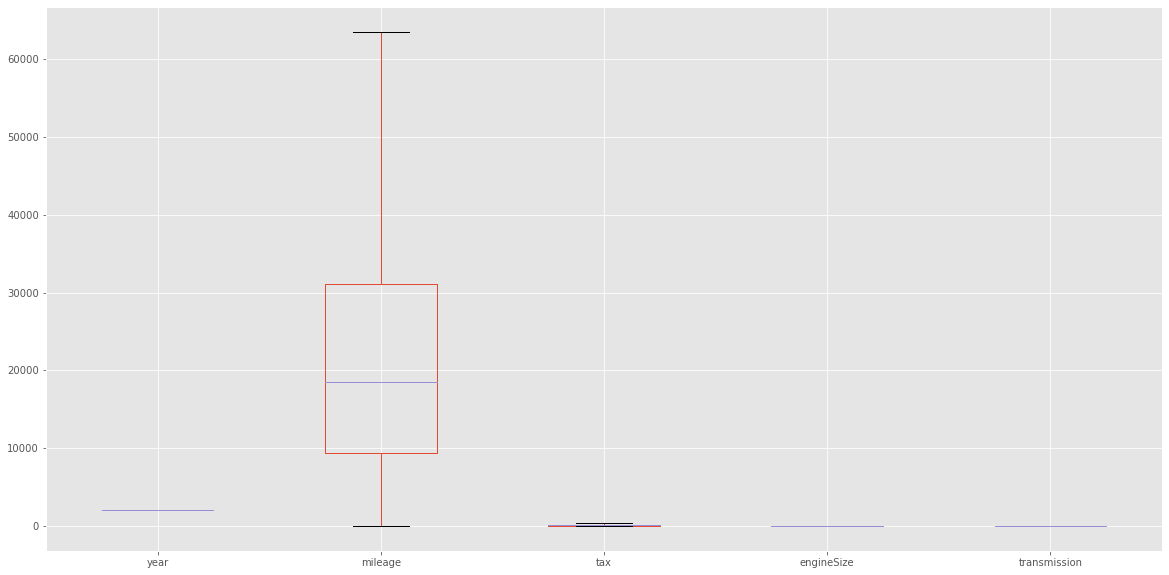

In [18]:
#Double checking that the outliers were actually removed.

plt.figure(figsize=(20,10))
df[outlier_cols].boxplot()

In [19]:
#Splitting some variables into groups as we know that it could help the training of our model.

labels=[0,1,2,3,4,5,6,7,8,9]
df['mileage_bin']=pd.cut(df['mileage'],len(labels),labels=labels)
df['mileage_bin']=df['mileage_bin'].astype(float)
labels=[0,1,2]
df['engineSize_bin']=pd.cut(df['engineSize'],len(labels),labels=labels)
df['engineSize_bin']=df['engineSize_bin'].astype(float)
labels=[0,1,2,3]
df['tax_bin']=pd.cut(df['tax'],len(labels),labels=labels)
df['tax_bin']=df['tax_bin'].astype(float)
labels=[0,1,2]
df['year_bin']=pd.cut(df['year'],len(labels),labels=labels)
df['year_bin']=df['year_bin'].astype(float)

In [20]:
#Choosing to work with the target variable in log scale as we earlier saw that in this form it looks more normally distributed
#and that will really help our model's performance.

df['price_log']=np.log(df['price'])

In [21]:
#Defining the independent and the dependent-target variables of our model.
#Then we split the dataset into training, validation and test subsets so that we can evaluate our model.
#Finally we standardize our independent variables since we earlier saw that the volumes of their values vary
#and we know that this could decrease our model's performance.

cols_drop=['price','mileage','tax','engineSize']
x=df.drop(cols_drop,axis=1)
y=df['price_log']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=25)
train_x,val_x,train_y,val_y=train_test_split(train_x,train_y,test_size=0.1,random_state=25)

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
val_x=scaler.fit_transform(val_x)
test_x=scaler.transform(test_x)

## Model Fitting 

In [22]:
#Outling the actual deep neural network with 5 hidden layers, 
#'relu-(Rectified Linear Unit)' as the activation function of each one of them,
#linear activation on the output layer as we are working on a regression problem
#while setting the width of the network to 80.

hidden_layer_size = 80

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_x.shape[1],)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

In [23]:
#Choosing the Mean Absolute Error as the loss function of our model
#while setting 'Adam-(Adaptive Moment Estimation)' as the optimizer with a learning rate of 0.0001.

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss = 'mean_absolute_error'
              )

In [24]:
#In order to avoid our model from overfitting we apply an early stopping mechanism,
#we set the maximum number of epochs to 100 while we also batch our training data set 
#so that the network trains on 100 values each time before validating.

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
batch_size = 100
max_epochs = 100

h = model.fit(train_x, train_y, 
              batch_size=batch_size,
              callbacks=[early_stopping],
              validation_data=(val_x, val_y),
              verbose=2,
              epochs=max_epochs
              )

Epoch 1/100
55/55 - 1s - loss: 8.7126 - val_loss: 8.0459 - 660ms/epoch - 12ms/step
Epoch 2/100
55/55 - 0s - loss: 6.3588 - val_loss: 3.3554 - 119ms/epoch - 2ms/step
Epoch 3/100
55/55 - 0s - loss: 1.7164 - val_loss: 1.1843 - 117ms/epoch - 2ms/step
Epoch 4/100
55/55 - 0s - loss: 1.1445 - val_loss: 0.9670 - 118ms/epoch - 2ms/step
Epoch 5/100
55/55 - 0s - loss: 0.9279 - val_loss: 0.8400 - 118ms/epoch - 2ms/step
Epoch 6/100
55/55 - 0s - loss: 0.7928 - val_loss: 0.7410 - 132ms/epoch - 2ms/step
Epoch 7/100
55/55 - 0s - loss: 0.6880 - val_loss: 0.6634 - 116ms/epoch - 2ms/step
Epoch 8/100
55/55 - 0s - loss: 0.5892 - val_loss: 0.5910 - 116ms/epoch - 2ms/step
Epoch 9/100
55/55 - 0s - loss: 0.4975 - val_loss: 0.5342 - 118ms/epoch - 2ms/step
Epoch 10/100
55/55 - 0s - loss: 0.4198 - val_loss: 0.4902 - 117ms/epoch - 2ms/step
Epoch 11/100
55/55 - 0s - loss: 0.3489 - val_loss: 0.4483 - 117ms/epoch - 2ms/step
Epoch 12/100
55/55 - 0s - loss: 0.2922 - val_loss: 0.4241 - 102ms/epoch - 2ms/step
Epoch 13/100

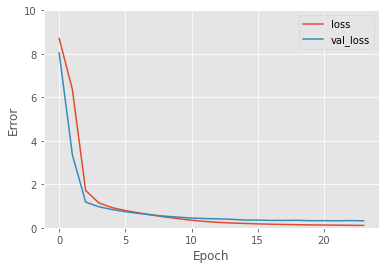

In [25]:
#Building a function for displaying the progress of the loss functions (both training and validation) along each epoch.

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(h)

## Model Evaluation

In [26]:
#Evaluating our model on the test dataset.

model.evaluate(test_x, test_y, verbose=2)

22/22 - 0s - loss: 0.3566 - 34ms/epoch - 2ms/step


0.3566009998321533

In [27]:
#Predicting the final price based on our test values.

y_pred = model.predict(test_x).flatten()

22/22 [==============================] - 0s 1ms/step


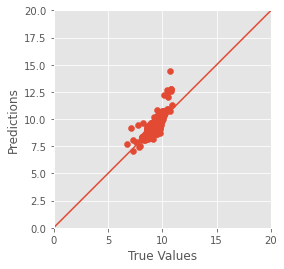

In [28]:
#Comparing the actual and the predicted price values.

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0,20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

[Text(0.5, 1.0, 'Predicted vs True Values')]

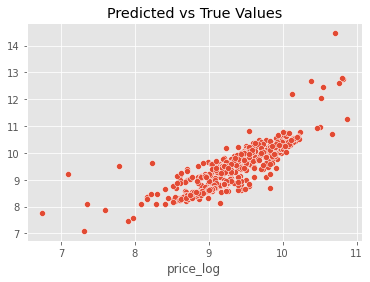

In [29]:
#Comparing the actual and the predicted price values again.

sns.scatterplot(y=y_pred,x=test_y).set(title='Predicted vs True Values')

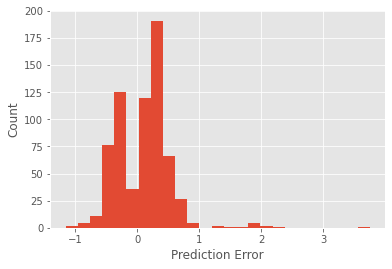

In [30]:
#Calculating the error of the predictions while displaying its distribution.

error = y_pred - test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

# RESULTS

Here the results of the model's predictions are displayed according to the purpose of the project.

The names of the graphs provided are self explanatory.

In [31]:
#Building a dataframe which contains the true and predicted price values along with the absolute error between them
#as well as defining a threshold-limit according to the purpose of the project (in that case 10% away from the actual price).

dff = pd.DataFrame(y_pred, columns=['Pred'])
dff['True'] = np.array(test_y)
dff['Error'] = np.array(error)
dff['AbsError'] = np.abs(dff['Error'])
dff['Thres'] = 0.1 * np.abs(dff['True'])
dff['Win'] = 0
for i in range(dff.shape[0]):
    if dff['AbsError'][i] < dff['Thres'][i]:
        dff['Win'][i] = 1
    else:
        dff['Win'][i] = 0
dff

C:\Users\KONSTA~1\AppData\Local\Temp/ipykernel_9948/803975279.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Win'][i] = 0
C:\Users\KONSTA~1\AppData\Local\Temp/ipykernel_9948/803975279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Win'][i] = 1


Pred       True     Error  AbsError     Thres  Win
0     8.102862   7.346010  0.756852  0.756852  0.734601    0
1     9.330822   9.178643  0.152179  0.152179  0.917864    1
2     8.599323   8.678461 -0.079138  0.079138  0.867846    1
3     8.554358   8.698014 -0.143655  0.143655  0.869801    1
4     7.748141   6.745236  1.002905  1.002905  0.674524    0
5    10.229852   9.830648  0.399204  0.399204  0.983065    1
6     9.789365   9.927692 -0.138327  0.138327  0.992769    1
7     9.645767   9.339613  0.306155  0.306155  0.933961    1
8     9.715175   9.433084  0.282091  0.282091  0.943308    1
9     8.493887   8.922392 -0.428505  0.428505  0.892239    1
10   10.245717   9.510445  0.735272  0.735272  0.951044    1
11    9.357129   9.104424  0.252705  0.252705  0.910442    1
12    9.546433   9.258178  0.288256  0.288256  0.925818    1
13    9.610433   8.229511  1.380922  1.380922  0.822951    0
14    9.774184   9.472320  0.301864  0.301864  0.947232    1
15   12.666144  10.388934  2.277211  2.277211  1.038893    0
16   10.171704   9.510075  0.661630  0.661630  0.951007    1
17    9.890548   9.491602  0.398946  0.398946  0.949160    1
18   10.084939   9.632335  0.452604  0.452604  0.963233    1
19   10.180892   9.998570  0.182322  0.182322  0.999857    1
20    9.442687   9.179675  0.263012  0.263012  0.917967    1
21    9.393453   9.189015  0.204438  0.204438  0.918901    1
22    9.357783   9.209840  0.147943  0.147943  0.920984    1
23    8.843333   8.985946 -0.142613  0.142613  0.898595    1
24    8.622236   8.961238 -0.339002  0.339002  0.896124    1
25    9.368392   9.259131  0.109261  0.109261  0.925913    1
26    8.804879   9.239802 -0.434923  0.434923  0.923980    1
27    9.357348   9.158521  0.198828  0.198828  0.915852    1
28    8.308940   8.612140 -0.303200  0.303200  0.861214    1
29    8.214416   8.541886 -0.327470  0.327470  0.854189    1
30    9.339840   9.104758  0.235082  0.235082  0.910476    1
31    9.465436   9.258178  0.207258  0.207258  0.925818    1
32    8.568074   8.853380 -0.285305  0.285305  0.885338    1
33    8.783340   9.135078 -0.351738  0.351738  0.913508    1
34    8.530400   8.852951 -0.322551  0.322551  0.885295    1
35    8.480451   8.894259 -0.413808  0.413808  0.889426    1
36    8.625762   8.948716 -0.322954  0.322954  0.894872    1
37   10.183025   9.830379  0.352646  0.352646  0.983038    1
38    8.749627   9.102755 -0.353128  0.353128  0.910276    1
39   10.031983   9.536041  0.495943  0.495943  0.953604    1
40    8.547960   8.948716 -0.400756  0.400756  0.894872    1
41    9.350867   9.249561  0.101306  0.101306  0.924956    1
42    9.091245   9.103868 -0.012623  0.012623  0.910387    1
43    8.303950   8.747987 -0.444037  0.444037  0.874799    1
44    8.621929   9.433324 -0.811395  0.811395  0.943332    1
45   10.253741   9.877708  0.376033  0.376033  0.987771    1
46    8.560786   8.968396 -0.407610  0.407610  0.896840    1
47    8.672671   8.410721  0.261950  0.261950  0.841072    1
48   10.256280   9.998707  0.257573  0.257573  0.999871    1
49   12.762057  10.819598  1.942459  1.942459  1.081960    0
50    8.333098   8.987197 -0.654098  0.654098  0.898720    1
51    9.445416   9.471550 -0.026134  0.026134  0.947155    1
52    9.517490   9.136694  0.380797  0.380797  0.913669    1
53    9.390837   8.698681  0.692156  0.692156  0.869868    1
54   10.365029   9.851931  0.513098  0.513098  0.985193    1
55   10.058940   9.472551  0.586389  0.586389  0.947255    1
56    8.483074   8.793460 -0.310386  0.310386  0.879346    1
57    9.312101   9.356603 -0.044502  0.044502  0.935660    1
58    8.977015   8.699181  0.277834  0.277834  0.869918    1
59    9.768725   9.852089 -0.083364  0.083364  0.985209    1
60    8.697997   9.067509 -0.369512  0.369512  0.906751    1
61    9.886237   9.900984 -0.014747  0.014747  0.990098    1
62    9.619757   9.332115  0.287641  0.287641  0.933212    1
63    9.615008   9.305196  0.309812  0.309812  0.930520    1
64    8.642681   8.973098 -0.330417  0.330417

In [32]:
#Showing how many times (in percentage) the prediction is closer than the predefined threshold.

(sum(dff['Win'])/dff.shape[0])*100

97.47774480712165

[Text(0.5, 1.0, 'Count of Prices Predicted less than 10% of the Actual Price')]

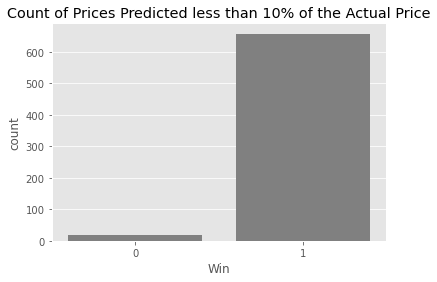

In [33]:
sns.countplot(x=dff['Win'], color='gray').set(title='Count of Prices Predicted less than 10% of the Actual Price')

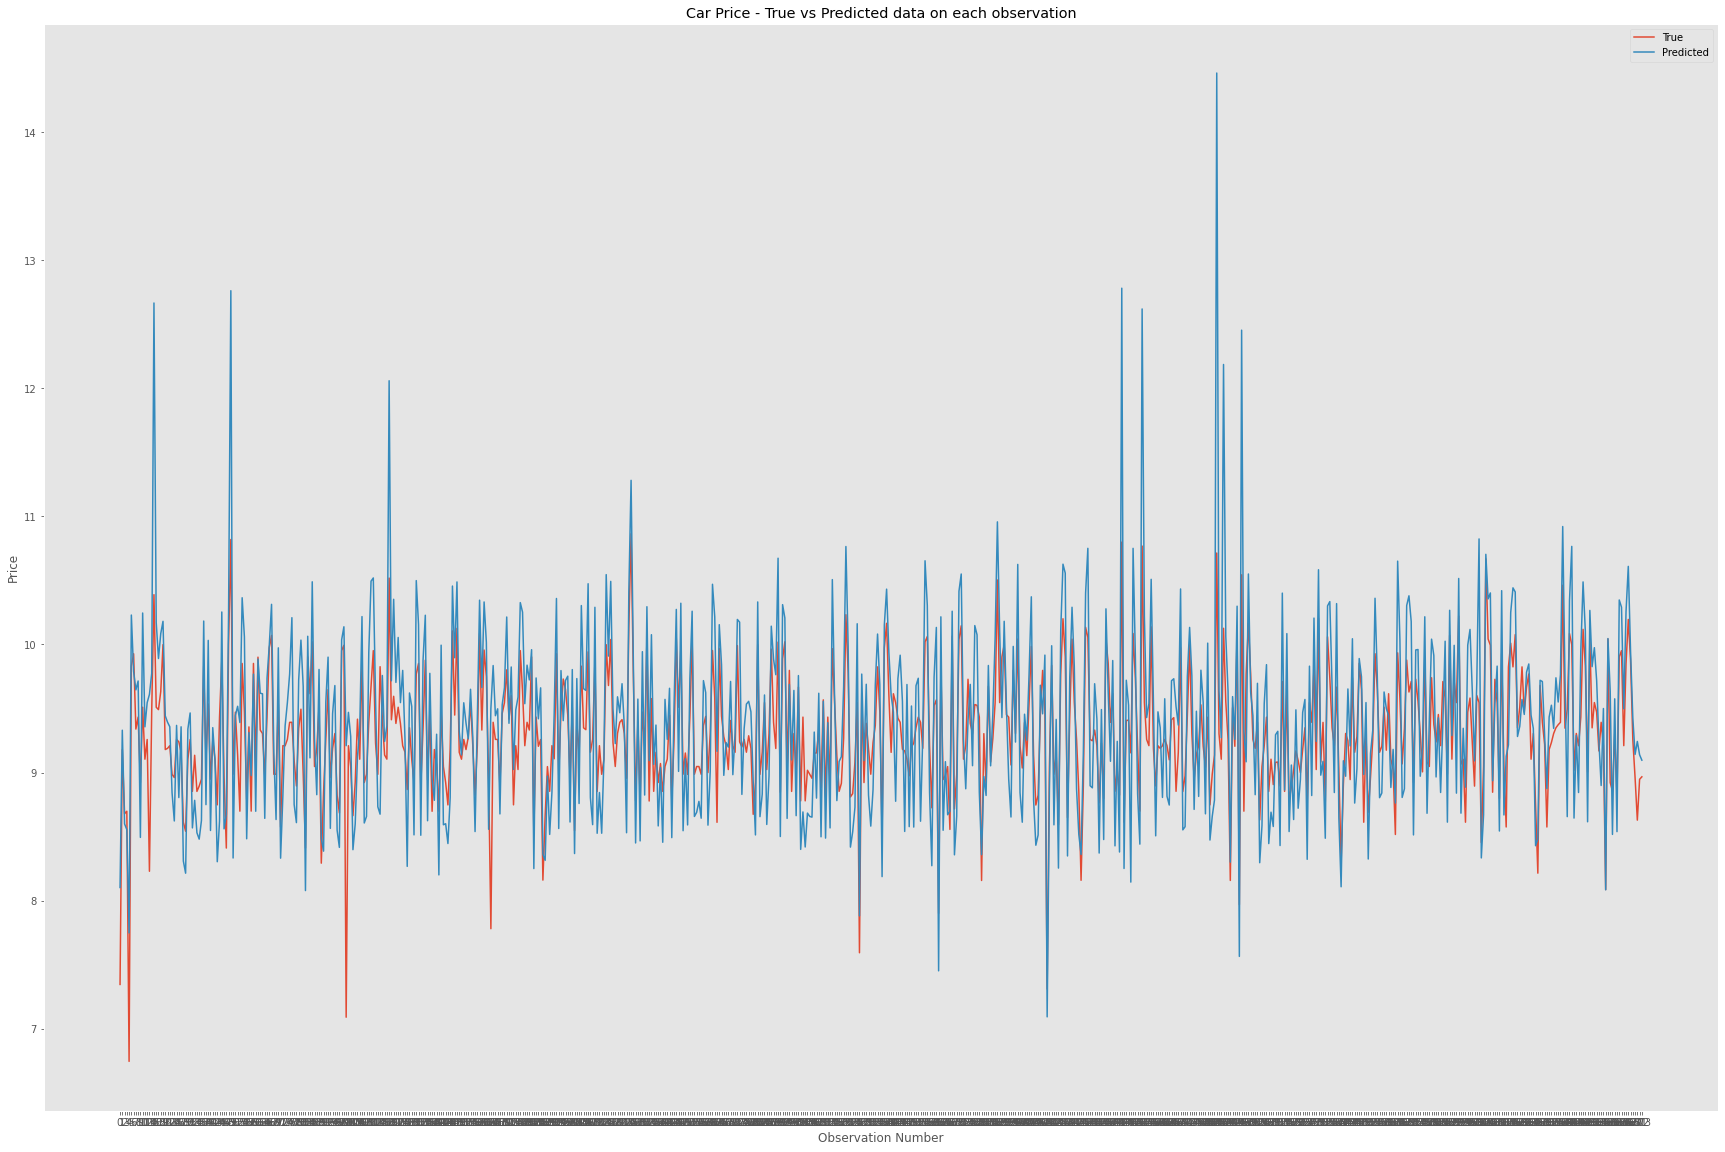

In [34]:
number_of_observations=test_y.shape[0]
x_ax = range(len(test_y[:number_of_observations]))
plt.figure(figsize=(30,20))
plt.plot(x_ax, test_y[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data on each observation")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()